In [81]:
import os

# Print the current working directory
print(f"Working directory: {os.getcwd()}")

Working directory: /home/rbo/projects/python/CCDATSCL_COM221_PROJECT


In [82]:
import os

file_path = 'combined_player_data.csv'

if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does not exist.")

The file 'combined_player_data.csv' exists.


In [83]:
import pandas as pd

file_path = 'combined_player_data.csv'
df = pd.read_csv(file_path)

display(df.head(10))

,player_slot,team_number,team_slot,hero_id,kills,deaths,assists,leaver_status,last_hits,denies,...,isRadiant,win,total_gold,total_xp,kills_per_min,kda,abandons,benchmarks,match_id,hero_name
0,2,0,2,81,15,10,15,0,204,5,...,True,1,25624,46348,0.385769,2.73,0,"{'gold_per_min': {'raw': 659, 'pct': 0.8960396...",8660412202,Chaos Knight
1,1,0,1,74,8,15,11,0,93,6,...,True,0,14009,13970,0.206718,1.19,0,"{'gold_per_min': {'raw': 362, 'pct': 0.2110009...",8660387354,Invoker
2,3,0,3,102,1,10,18,0,131,6,...,True,0,13957,21083,0.023715,1.73,0,"{'gold_per_min': {'raw': 331, 'pct': 0.3785488...",8659172466,Abaddon
3,131,1,3,105,14,17,10,0,96,0,...,False,0,20457,25640,0.302485,1.33,0,"{'gold_per_min': {'raw': 442, 'pct': 0.6259204...",8659142743,Techies
4,3,0,3,62,9,24,22,0,61,5,...,True,1,26934,34364,0.164735,1.24,0,"{'gold_per_min': {'raw': 493, 'pct': 0.6225596...",8657961379,Bounty Hunter
5,0,0,0,21,15,13,21,0,231,4,...,True,1,32532,61143,0.271575,2.57,0,"{'gold_per_min': {'raw': 589, 'pct': 0.8191403...",8657926118,Windranger
6,0,0,0,40,14,14,18,0,427,10,...,True,1,47063,67751,0.189488,2.13,0,"{'gold_per_min': {'raw': 637, 'pct': 0.9828178...",8656697856,Venomancer
7,131,1,3,44,10,10,16,0,415,3,...,False,0,33746,47833,0.193798,2.36,0,"{'gold_per_min': {'raw': 654, 'pct': 0.6788888...",8653893230,Phantom Assassin
8,131,1,3,104,11,14,25,0,409,18,...,False,1,38212,62787,0.175020,2.40,0,"{'gold_per_min': {'raw': 608, 'pct': 0.9102196...",8679428811,Legion Commander
9,131,1,3,33,1,6,6,0,138,1,...,False,0,12092,14435,0.029441,1.00,0,"{'gold_per_min': {'raw': 356, 'pct': 0.4052631...",8676947936,Enigma


In [84]:
if 'match_id' in df.columns:
    total_matches = df['match_id'].nunique()
    print(f"The total number of matches in the dataset is: {total_matches}")
else:
    print("Could not find a 'match_id' column. Please specify which column identifies unique matches.")

The total number of matches in the dataset is: 99


In [85]:
if 'hero_id' in df.columns:
    total_unique_heroes = df['hero_id'].nunique()
    print(f"The total number of unique heroes in the dataset is: {total_unique_heroes}")
else:
    print("Could not find a 'hero_id' column. Please specify which column identifies heroes.")

The total number of unique heroes in the dataset is: 37


In [86]:
if 'win' in df.columns:
    overall_win_rate = df['win'].mean() * 100
    print(f"The overall win rate is: {overall_win_rate:.2f}%")
else:
    print("Could not find a 'win' column. Please specify which column indicates the win status.")

The overall win rate is: 51.52%


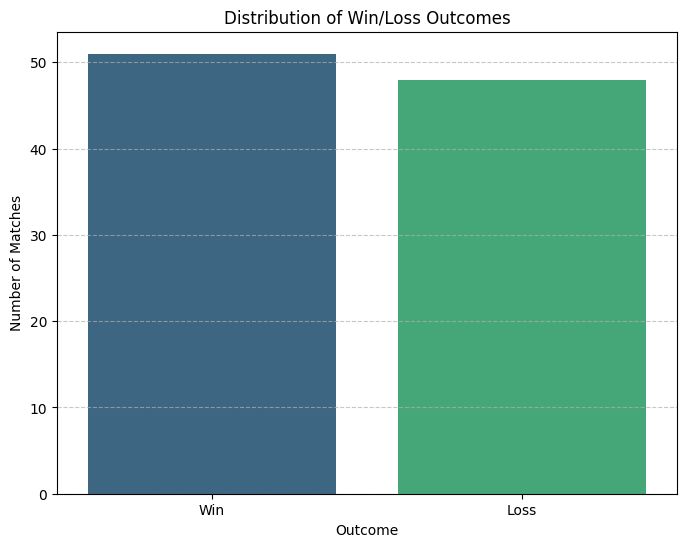

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns:
    # Calculate the count of wins and losses
    win_counts = df['win'].value_counts().reset_index()
    win_counts.columns = ['Win_Status', 'Count']

    # Map 1 to 'Win' and 0 to 'Loss' for better readability
    win_counts['Win_Status'] = win_counts['Win_Status'].map({1: 'Win', 0: 'Loss'})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Win_Status', y='Count', data=win_counts, hue='Win_Status', palette='viridis', legend=False)
    plt.title('Distribution of Win/Loss Outcomes')
    plt.xlabel('Outcome')
    plt.ylabel('Number of Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find a 'win' column. Please specify which column indicates the win status.")

In [88]:
if 'duration' in df.columns:
    average_duration_seconds = df['duration'].mean()
    # Convert duration from seconds to minutes for better readability
    average_duration_minutes = average_duration_seconds / 60
    print(f"The average match duration is: {average_duration_minutes:.2f} minutes ({average_duration_seconds:.0f} seconds)")
else:
    print("Could not find a 'duration' column. Please specify which column indicates match duration.")

The average match duration is: 42.60 minutes (2556 seconds)


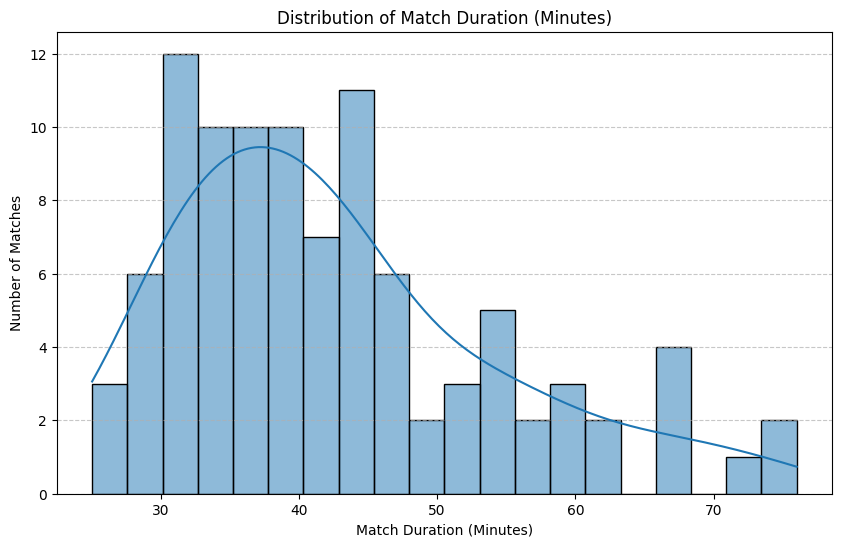

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'duration' in df.columns:
    # Convert duration from seconds to minutes for plotting
    df['duration_minutes'] = df['duration'] / 60

    plt.figure(figsize=(10, 6))
    sns.histplot(df['duration_minutes'], bins=20, kde=True)
    plt.title('Distribution of Match Duration (Minutes)')
    plt.xlabel('Match Duration (Minutes)')
    plt.ylabel('Number of Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find a 'duration' column to plot. Please specify which column indicates match duration.")

In [90]:
import numpy as np

# Ensure 'Kills', 'Assists', and 'Deaths' columns exist
required_columns = ['kills', 'assists', 'deaths', 'match_id', 'player_slot']

if all(col in df.columns for col in required_columns):
    # Calculate KDA Ratio per player. Handle division by zero for 'deaths'.
    # Replace 0 deaths with 1 to avoid infinity, as per common practice for KDA.
    df['deaths_safe'] = df['deaths'].replace(0, 1)
    df['calculated_kda_ratio'] = (df['kills'] + df['assists']) / df['deaths_safe']

    # Create a new DataFrame with the calculated KDA per player per match
    kda_per_match_df = df[['match_id', 'player_slot', 'calculated_kda_ratio']].copy()

    print("KDA per player per match DataFrame created:")
    display(kda_per_match_df.head(10))
else:
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Missing required columns to calculate KDA: {missing_cols}. Please ensure 'kills', 'assists', and 'deaths' columns are available.")

KDA per player per match DataFrame created:


,match_id,player_slot,calculated_kda_ratio
0,8660412202,2,3.000000
1,8660387354,1,1.266667
2,8659172466,3,1.900000
3,8659142743,131,1.411765
4,8657961379,3,1.291667
5,8657926118,0,2.769231
6,8656697856,0,2.285714
7,8653893230,131,2.600000
8,8679428811,131,2.571429
9,8676947936,131,1.166667


In [91]:
if 'calculated_kda_ratio' in kda_per_match_df.columns:
    print("Descriptive Statistics for Calculated KDA Ratio:")
    display(kda_per_match_df['calculated_kda_ratio'].describe())
else:
    print("Could not find 'calculated_kda_ratio' in kda_per_match_df.")

Descriptive Statistics for Calculated KDA Ratio:


count    99.000000
mean      3.353147
std       2.247879
min       0.750000
25%       1.919872
50%       2.666667
75%       4.200000
max      12.666667
Name: calculated_kda_ratio, dtype: float64

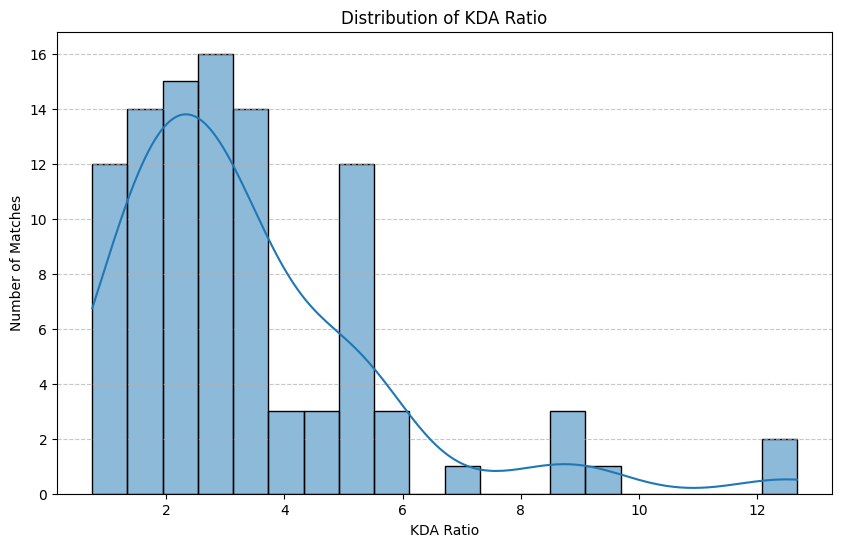

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'calculated_kda_ratio' in kda_per_match_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(kda_per_match_df['calculated_kda_ratio'], bins=20, kde=True)
    plt.title('Distribution of KDA Ratio')
    plt.xlabel('KDA Ratio')
    plt.ylabel('Number of Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find 'calculated_kda_ratio' in kda_per_match_df to plot. Please ensure the KDA ratio has been calculated.")

In [93]:
if 'gold_per_min' in df.columns:
    # Calculate descriptive statistics for Gold per Minute (GPM)
    gpm_stats = df['gold_per_min'].describe()
    print("Descriptive Statistics for Gold per Minute (GPM):")
    display(gpm_stats)
else:
    print("Could not find a 'gold_per_min' column. Please ensure the column name is correct.")

Descriptive Statistics for Gold per Minute (GPM):


count     99.000000
mean     499.090909
std      150.396285
min      234.000000
25%      368.000000
50%      480.000000
75%      610.500000
max      896.000000
Name: gold_per_min, dtype: float64

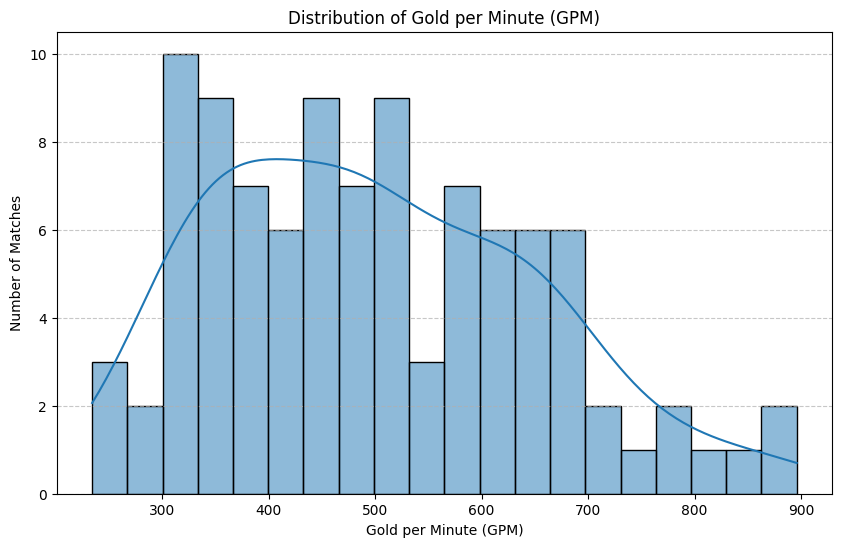

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'gold_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['gold_per_min'], bins=20, kde=True)
    plt.title('Distribution of Gold per Minute (GPM)')
    plt.xlabel('Gold per Minute (GPM)')
    plt.ylabel('Number of Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find a 'gold_per_min' column to plot. Please ensure the column name is correct.")

In [95]:
if 'xp_per_min' in df.columns:
    # Calculate descriptive statistics for Experience per Minute (XPM)
    xpm_stats = df['xp_per_min'].describe()
    print("Descriptive Statistics for Experience per Minute (XPM):")
    display(xpm_stats)
else:
    print("Could not find an 'xp_per_min' column. Please ensure the column name is correct.")

Descriptive Statistics for Experience per Minute (XPM):


count      99.000000
mean      714.000000
std       221.510031
min       312.000000
25%       533.500000
50%       673.000000
75%       918.000000
max      1263.000000
Name: xp_per_min, dtype: float64

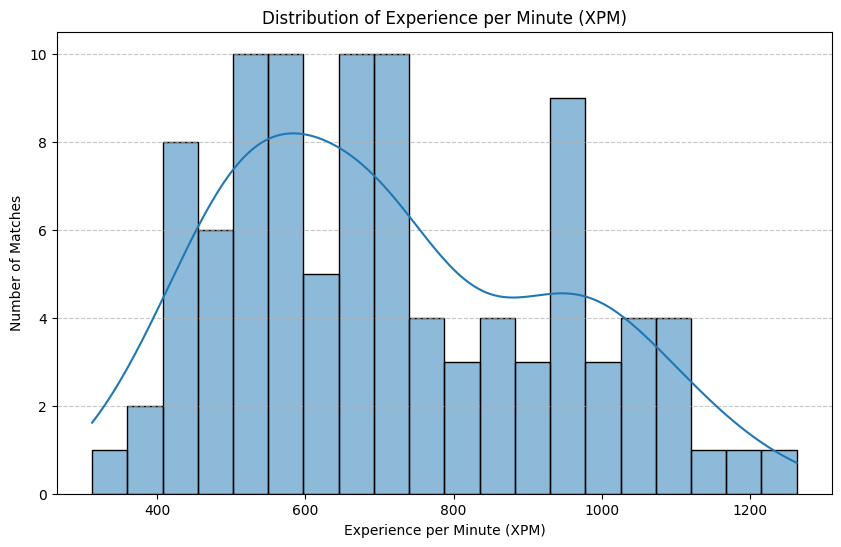

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'xp_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['xp_per_min'], bins=20, kde=True)
    plt.title('Distribution of Experience per Minute (XPM)')
    plt.xlabel('Experience per Minute (XPM)')
    plt.ylabel('Number of Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find an 'xp_per_min' column to plot. Please ensure the column name is correct.")

In [97]:
if 'start_time' in df.columns:
    df['start_time'] = pd.to_datetime(df['start_time'], unit='s') # Assuming start_time is in Unix timestamp (seconds)
    print(f"'start_time' column successfully converted to datetime. New dtype: {df['start_time'].dtype}")
    display(df[['start_time']].head())
else:
    print("Could not find a 'start_time' column. Please ensure the column name is correct.")

'start_time' column successfully converted to datetime. New dtype: datetime64[ns]


,start_time
0,2026-01-23 04:58:48
1,2026-01-23 04:14:58
2,2026-01-22 04:50:58
3,2026-01-22 03:56:48
4,2026-01-21 05:32:46


In [98]:
if 'start_time' in df.columns:
    # Ensure 'start_time' is datetime (already converted in a previous step)
    # Create a 'match_week' column by extracting the week from 'start_time'
    df['match_week'] = df['start_time'].dt.to_period('W')

    # Group by 'match_week' and count unique matches per week
    matches_by_week = df.groupby('match_week')['match_id'].nunique().sort_index()

    print("Matches grouped by week (chronological order):")
    display(matches_by_week)

    # Optional: Display a few matches for each week for verification
    # print("\nFirst match_id for each week:")
    # display(df.groupby('match_week')['match_id'].first().sort_index().reset_index())

else:
    print("Could not find a 'start_time' column. Please ensure the column name is correct and it's converted to datetime.")

Matches grouped by week (chronological order):


match_week
2025-11-10/2025-11-16     1
2025-11-17/2025-11-23    10
2025-11-24/2025-11-30     8
2025-12-01/2025-12-07     4
2025-12-08/2025-12-14    10
2025-12-15/2025-12-21     9
2025-12-22/2025-12-28    13
2025-12-29/2026-01-04     3
2026-01-05/2026-01-11     7
2026-01-12/2026-01-18    10
2026-01-19/2026-01-25     8
2026-01-26/2026-02-01     7
2026-02-02/2026-02-08     9
Freq: W-SUN, Name: match_id, dtype: int64

In [99]:
if 'match_week' in df.columns and 'calculated_kda_ratio' in df.columns and 'gold_per_min' in df.columns and 'xp_per_min' in df.columns and 'win' in df.columns:
    # Group by match_week and calculate averages
    weekly_averages = df.groupby('match_week').agg(
        weekly_kda_avg=('calculated_kda_ratio', 'mean'),
        weekly_gpm_avg=('gold_per_min', 'mean'),
        weekly_xpm_avg=('xp_per_min', 'mean'),
        weekly_win_rate=('win', lambda x: x.mean() * 100) # Calculate win rate as percentage
    ).sort_index()

    print("Weekly Averages for KDA, GPM, XPM, and Win Rate:")
    display(weekly_averages)
else:
    missing_cols = []
    if 'match_week' not in df.columns: missing_cols.append('match_week')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    if 'win' not in df.columns: missing_cols.append('win')
    print(f"Could not find required columns for weekly average calculation: {', '.join(missing_cols)}. Please ensure they are created.")

Weekly Averages for KDA, GPM, XPM, and Win Rate:


,weekly_kda_avg,weekly_gpm_avg,weekly_xpm_avg,weekly_win_rate
match_week,,,,
2025-11-10/2025-11-16,3.181818,834.000000,1102.000000,0.000000
2025-11-17/2025-11-23,2.782515,544.900000,786.000000,30.000000
2025-11-24/2025-11-30,2.966574,438.125000,604.500000,50.000000
2025-12-01/2025-12-07,7.770833,657.750000,935.250000,75.000000
2025-12-08/2025-12-14,3.926190,616.200000,816.300000,60.000000
2025-12-15/2025-12-21,2.328853,389.111111,554.000000,22.222222
2025-12-22/2025-12-28,4.732184,427.769231,697.461538,84.615385
2025-12-29/2026-01-04,3.347222,478.000000,732.333333,33.333333
2026-01-05/2026-01-11,3.347145,468.000000,657.285714,85.714286


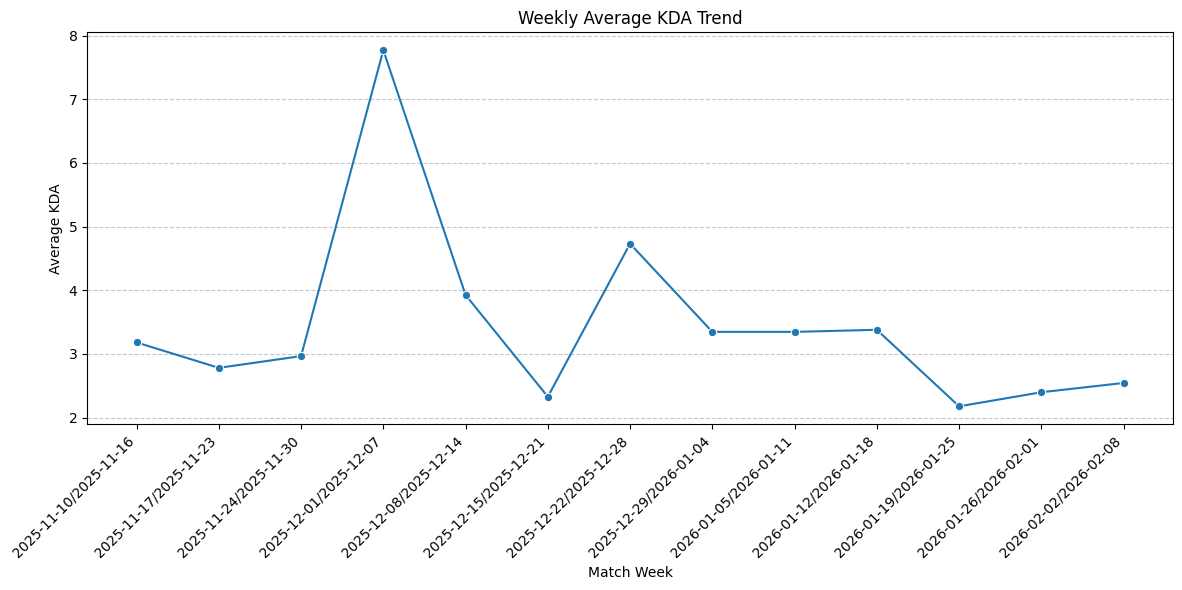

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_kda_avg' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_kda_avg', data=weekly_averages, marker='o')
    plt.title('Weekly Average KDA Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average KDA')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_kda_avg' in the weekly_averages DataFrame.")

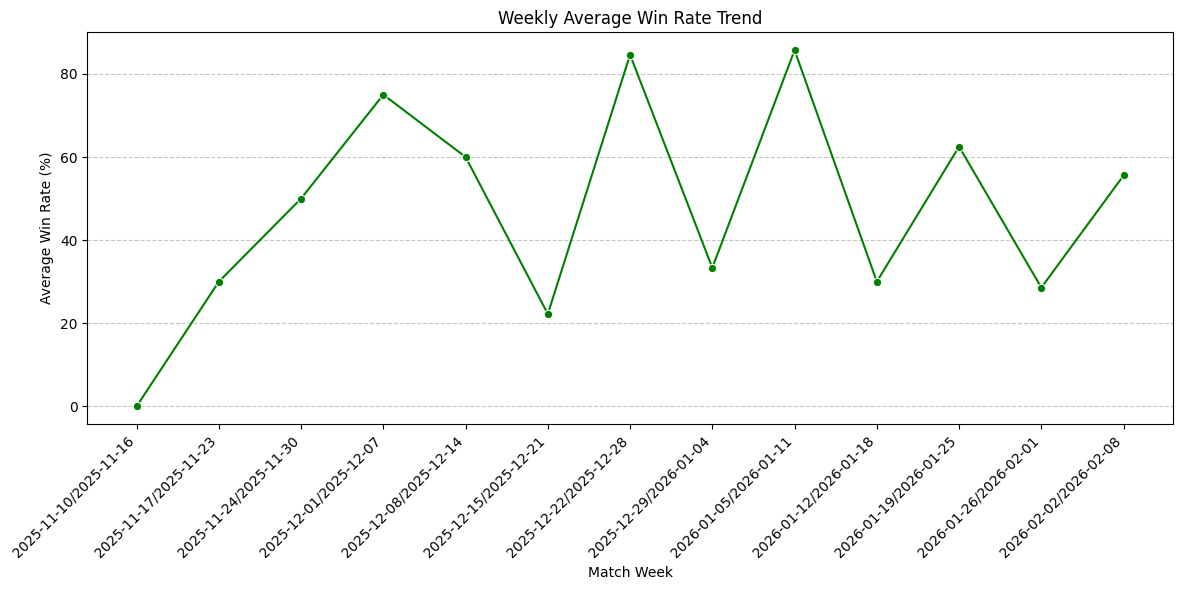

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_win_rate' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_win_rate', data=weekly_averages, marker='o', color='green')
    plt.title('Weekly Average Win Rate Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average Win Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_win_rate' in the weekly_averages DataFrame.")

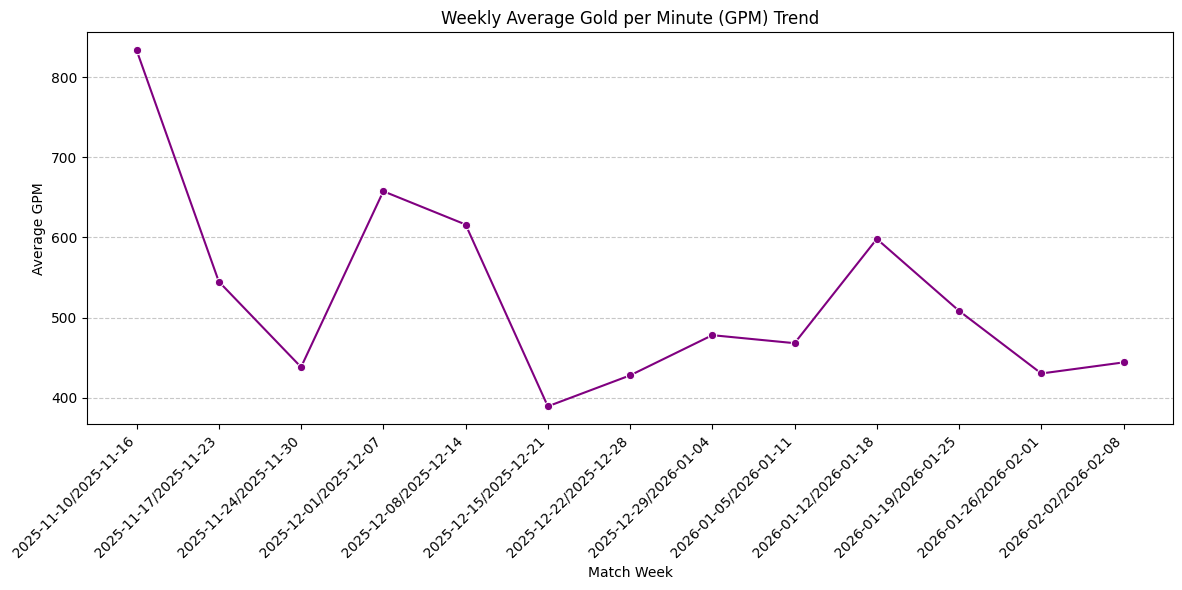

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_gpm_avg' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_gpm_avg', data=weekly_averages, marker='o', color='purple')
    plt.title('Weekly Average Gold per Minute (GPM) Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average GPM')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_gpm_avg' in the weekly_averages DataFrame.")

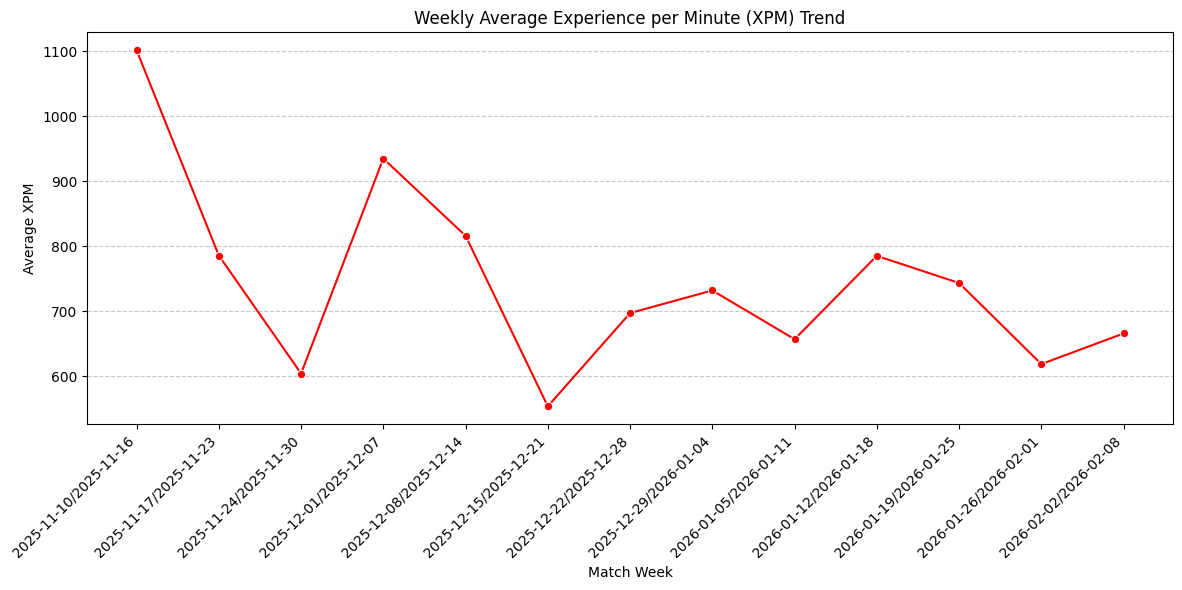

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_xpm_avg' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_xpm_avg', data=weekly_averages, marker='o', color='red')
    plt.title('Weekly Average Experience per Minute (XPM) Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average XPM')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_xpm_avg' in the weekly_averages DataFrame.")

In [104]:
if 'win' in df.columns and 'calculated_kda_ratio' in df.columns:
    mean_kda_by_win_status = df.groupby('win')['calculated_kda_ratio'].mean().reset_index()
    mean_kda_by_win_status['win_status_label'] = mean_kda_by_win_status['win'].map({1: 'Win', 0: 'Loss'})

    print("Mean KDA Ratio grouped by Win Status:")
    display(mean_kda_by_win_status[['win_status_label', 'calculated_kda_ratio']])
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Mean KDA Ratio grouped by Win Status:


,win_status_label,calculated_kda_ratio
0,Loss,2.053981
1,Win,4.575892


In [105]:
if 'win' in df.columns and 'gold_per_min' in df.columns:
    mean_gpm_by_win_status = df.groupby('win')['gold_per_min'].mean().reset_index()
    mean_gpm_by_win_status['win_status_label'] = mean_gpm_by_win_status['win'].map({1: 'Win', 0: 'Loss'})

    print("Mean Gold per Minute (GPM) grouped by Win Status:")
    display(mean_gpm_by_win_status[['win_status_label', 'gold_per_min']])
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Mean Gold per Minute (GPM) grouped by Win Status:


,win_status_label,gold_per_min
0,Loss,455.979167
1,Win,539.666667


In [106]:
if 'win' in df.columns and 'xp_per_min' in df.columns:
    mean_xpm_by_win_status = df.groupby('win')['xp_per_min'].mean().reset_index()
    mean_xpm_by_win_status['win_status_label'] = mean_xpm_by_win_status['win'].map({1: 'Win', 0: 'Loss'})

    print("Mean Experience per Minute (XPM) grouped by Win Status:")
    display(mean_xpm_by_win_status[['win_status_label', 'xp_per_min']])
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Mean Experience per Minute (XPM) grouped by Win Status:


,win_status_label,xp_per_min
0,Loss,654.562500
1,Win,769.941176


In [107]:
from scipy import stats
import numpy as np

# Ensure 'win' column exists and is numeric (0/1)
if 'win' not in df.columns:
    print("Error: 'win' column not found in DataFrame.")
else:
    # Separate data into win and loss groups
    win_group = df[df['win'] == 1]
    loss_group = df[df['win'] == 0]

    metrics_to_test = ['calculated_kda_ratio', 'gold_per_min', 'xp_per_min']

    print("### Mann-Whitney U Test (Win vs. Loss Groups) ###\n")

    for metric in metrics_to_test:
        if metric not in df.columns:
            print(f"Skipping Mann-Whitney U test for '{metric}' as the column was not found.")
            continue

        # Extract non-null data for the current metric for both groups
        data_win = win_group[metric].dropna()
        data_loss = loss_group[metric].dropna()

        n_win = len(data_win)
        n_loss = len(data_loss)

        if n_win == 0 or n_loss == 0:
            print(f"--- {metric.replace('_', ' ').title()} ---")
            print("Not enough data after removing missing values to run the test.")
            print("\n")
            continue

        # Perform Mann-Whitney U test (non-parametric)
        u_statistic, p_value = stats.mannwhitneyu(data_win, data_loss, alternative='two-sided')

        # Rank-biserial correlation as effect size for Mann-Whitney U
        rank_biserial = (2 * u_statistic) / (n_win * n_loss) - 1

        print(f"--- {metric.replace('_', ' ').title()} ---")
        print(f"U-statistic: {u_statistic:.3f}")
        print(f"P-value: {p_value:.3f}")
        print(f"Rank-biserial correlation: {rank_biserial:.3f}")

        alpha = 0.05 # Significance level
        if p_value < alpha:
            print(f"Conclusion: There is a statistically significant difference in {metric.replace('_', ' ').title()} between winning and losing matches (p < {alpha}).")
        else:
            print(f"Conclusion: There is no statistically significant difference in {metric.replace('_', ' ').title()} between winning and losing matches (p >= {alpha}).")
        print("\n")

### Mann-Whitney U Test (Win vs. Loss Groups) ###

--- Calculated Kda Ratio ---
U-statistic: 2153.500
P-value: 0.000
Rank-biserial correlation: 0.759
Conclusion: There is a statistically significant difference in Calculated Kda Ratio between winning and losing matches (p < 0.05).


--- Gold Per Min ---
U-statistic: 1627.000
P-value: 0.005
Rank-biserial correlation: 0.329
Conclusion: There is a statistically significant difference in Gold Per Min between winning and losing matches (p < 0.05).


--- Xp Per Min ---
U-statistic: 1597.000
P-value: 0.009
Rank-biserial correlation: 0.305
Conclusion: There is a statistically significant difference in Xp Per Min between winning and losing matches (p < 0.05).




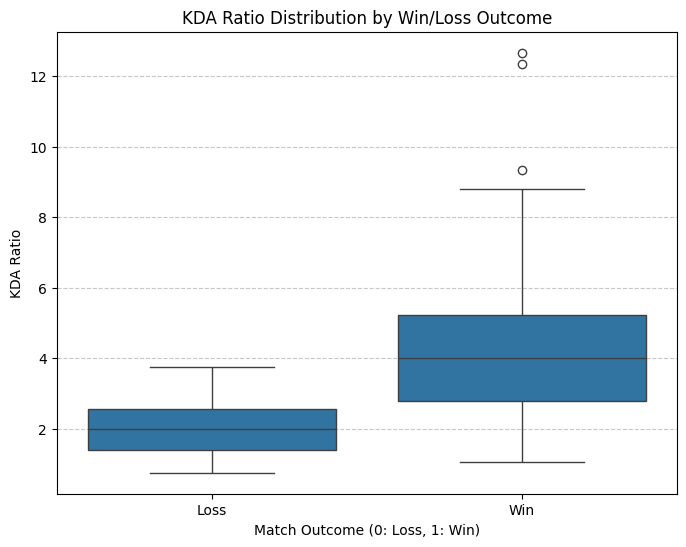

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns and 'calculated_kda_ratio' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='win', y='calculated_kda_ratio', data=df)
    plt.title('KDA Ratio Distribution by Win/Loss Outcome')
    plt.xlabel('Match Outcome (0: Loss, 1: Win)')
    plt.ylabel('KDA Ratio')
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

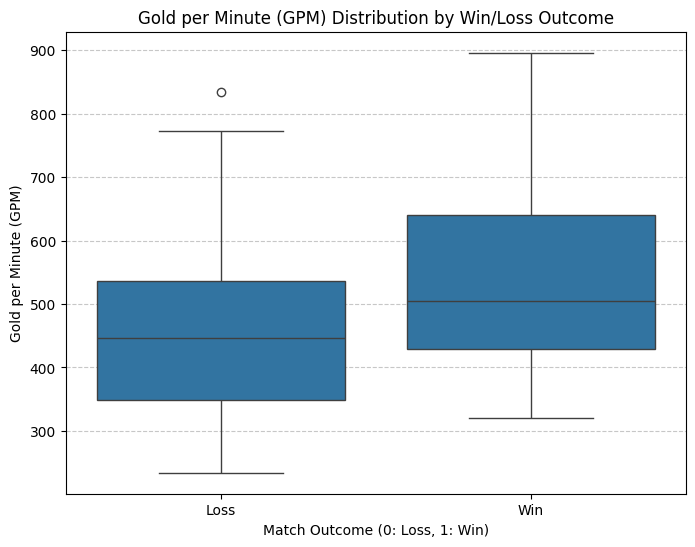

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns and 'gold_per_min' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='win', y='gold_per_min', data=df)
    plt.title('Gold per Minute (GPM) Distribution by Win/Loss Outcome')
    plt.xlabel('Match Outcome (0: Loss, 1: Win)')
    plt.ylabel('Gold per Minute (GPM)')
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

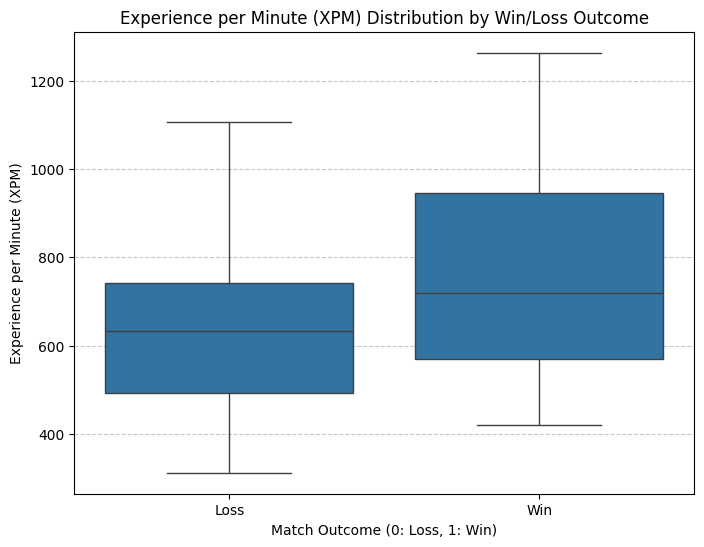

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns and 'xp_per_min' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='win', y='xp_per_min', data=df)
    plt.title('Experience per Minute (XPM) Distribution by Win/Loss Outcome')
    plt.xlabel('Match Outcome (0: Loss, 1: Win)')
    plt.ylabel('Experience per Minute (XPM)')
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

In [111]:
if 'hero_id' in df.columns:
    hero_usage_frequency = df['hero_id'].value_counts().reset_index()
    hero_usage_frequency.columns = ['Hero ID', 'Usage Count']
    print("Frequency of hero usage:")
    display(hero_usage_frequency)
else:
    print("Could not find a 'hero_id' column. Please specify which column identifies heroes.")

Frequency of hero usage:


,Hero ID,Usage Count
0,100,15
1,104,12
2,14,5
3,71,5
4,1,5
5,41,5
6,8,5
7,35,4
8,7,4
9,48,3


In [112]:
if 'hero_id' in df.columns and 'hero_name' in df.columns:
    # Calculate hero usage frequency
    hero_usage_frequency = df['hero_id'].value_counts().reset_index()
    hero_usage_frequency.columns = ['hero_id', 'Usage Count']

    # Get unique hero_id and hero_name pairs from the original DataFrame
    hero_names_map = df[['hero_id', 'hero_name']].drop_duplicates().set_index('hero_id')

    # Merge the frequency with the hero names
    hero_usage_with_names = hero_usage_frequency.set_index('hero_id').join(hero_names_map).reset_index()
    hero_usage_with_names = hero_usage_with_names[['hero_id', 'hero_name', 'Usage Count']]

    print("Frequency of hero usage with names:")
    display(hero_usage_with_names)
else:
    print("Could not find 'hero_id' or 'hero_name' columns. Please ensure they are available.")

Frequency of hero usage with names:


,hero_id,hero_name,Usage Count
0,100,Tusk,15
1,104,Legion Commander,12
2,14,Pudge,5
3,71,Spirit Breaker,5
4,1,Anti-Mage,5
5,41,Faceless Void,5
6,8,Juggernaut,5
7,35,Sniper,4
8,7,Earthshaker,4
9,48,Luna,3


In [113]:
if 'hero_id' in df.columns and 'hero_name' in df.columns and 'win' in df.columns:
    # Group by hero_id and hero_name to calculate win rate
    hero_win_rates = df.groupby(['hero_id', 'hero_name'])['win'].mean().reset_index()
    hero_win_rates['win_rate_percentage'] = hero_win_rates['win'] * 100

    # Sort by win rate for better insights
    hero_win_rates_sorted = hero_win_rates.sort_values(by='win_rate_percentage', ascending=False)

    print("Win Rate per Hero (including hero name):")
    display(hero_win_rates_sorted[['hero_name', 'win_rate_percentage']])
else:
    missing_cols = []
    if 'hero_id' not in df.columns: missing_cols.append('hero_id')
    if 'hero_name' not in df.columns: missing_cols.append('hero_name')
    if 'win' not in df.columns: missing_cols.append('win')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Win Rate per Hero (including hero name):


,hero_name,win_rate_percentage
4,Shadow Fiend,100.000000
36,Mars,100.000000
15,Venomancer,100.000000
10,Lion,100.000000
7,Sven,100.000000
25,Chaos Knight,100.000000
26,Ogre Magi,100.000000
28,Nyx Assassin,100.000000
21,Bounty Hunter,100.000000
23,Spirit Breaker,80.000000


In [114]:
if 'hero_id' in df.columns and 'hero_name' in df.columns and 'calculated_kda_ratio' in df.columns:
    # Group by hero_id and hero_name to calculate average KDA
    hero_average_kda = df.groupby(['hero_id', 'hero_name'])['calculated_kda_ratio'].mean().reset_index()

    # Sort by average KDA for better insights
    hero_average_kda_sorted = hero_average_kda.sort_values(by='calculated_kda_ratio', ascending=False)

    print("Average KDA per Hero (including hero name):")
    display(hero_average_kda_sorted[['hero_name', 'calculated_kda_ratio']])
else:
    missing_cols = []
    if 'hero_id' not in df.columns: missing_cols.append('hero_id')
    if 'hero_name' not in df.columns: missing_cols.append('hero_name')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Average KDA per Hero (including hero name):


,hero_name,calculated_kda_ratio
26,Ogre Magi,9.333333
13,Sniper,6.076389
7,Sven,4.666667
3,Juggernaut,4.361765
23,Spirit Breaker,4.223016
18,Luna,4.133333
33,Legion Commander,4.012828
0,Anti-Mage,3.798983
10,Lion,3.791667
4,Shadow Fiend,3.750000


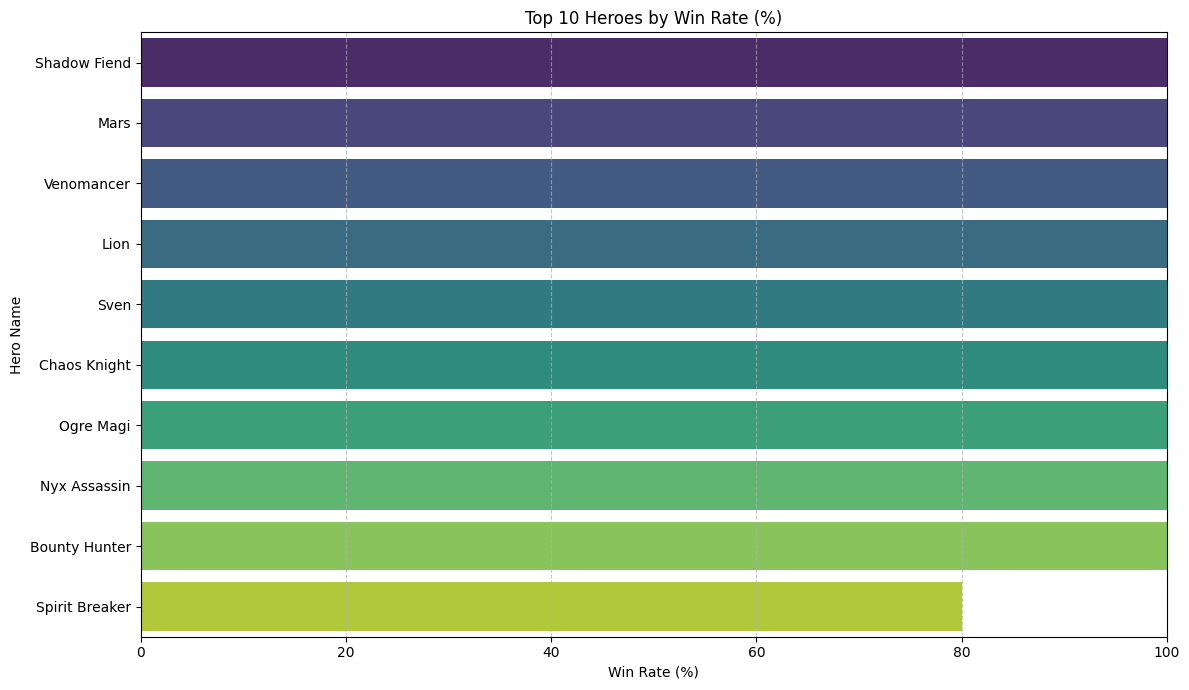

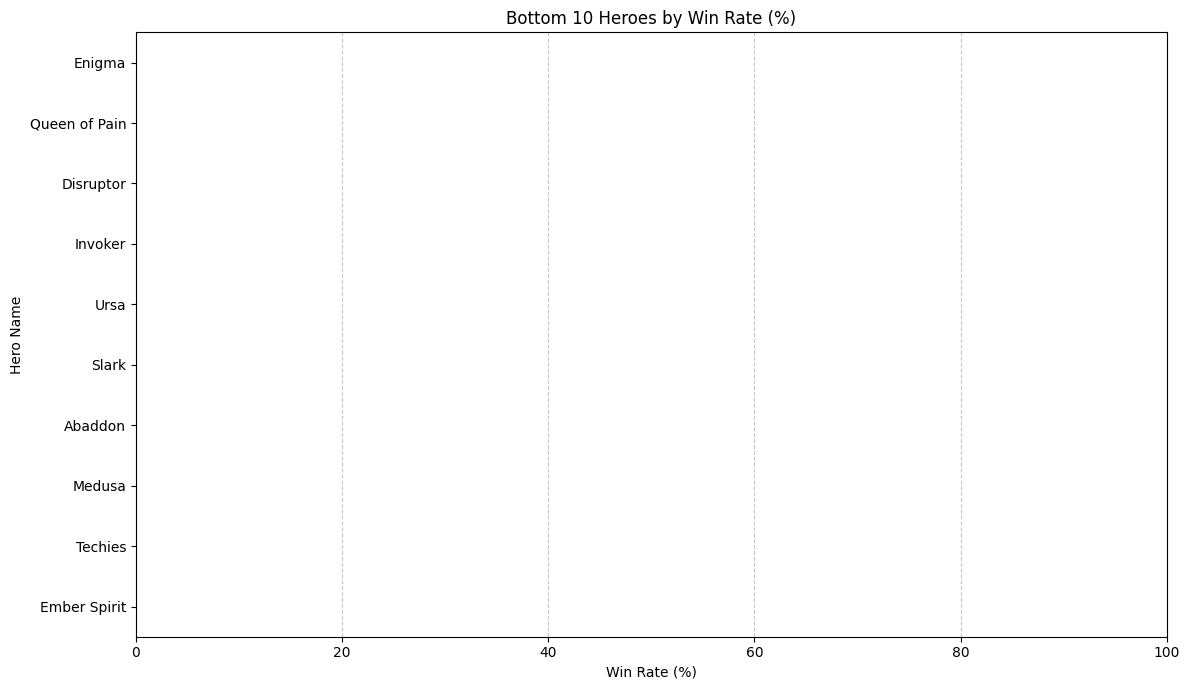

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'hero_name' in hero_win_rates_sorted.columns and 'win_rate_percentage' in hero_win_rates_sorted.columns:
    # Get top 10 heroes by win rate
    top_10_heroes = hero_win_rates_sorted.head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='win_rate_percentage', y='hero_name', data=top_10_heroes, hue='hero_name', palette='viridis', legend=False)
    plt.title('Top 10 Heroes by Win Rate (%)')
    plt.xlabel('Win Rate (%)')
    plt.ylabel('Hero Name')
    plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Get bottom 10 heroes by win rate
    bottom_10_heroes = hero_win_rates_sorted.tail(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='win_rate_percentage', y='hero_name', data=bottom_10_heroes, hue='hero_name', palette='plasma', legend=False)
    plt.title('Bottom 10 Heroes by Win Rate (%)')
    plt.xlabel('Win Rate (%)')
    plt.ylabel('Hero Name')
    plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'hero_name' or 'win_rate_percentage' in the hero_win_rates_sorted DataFrame.")

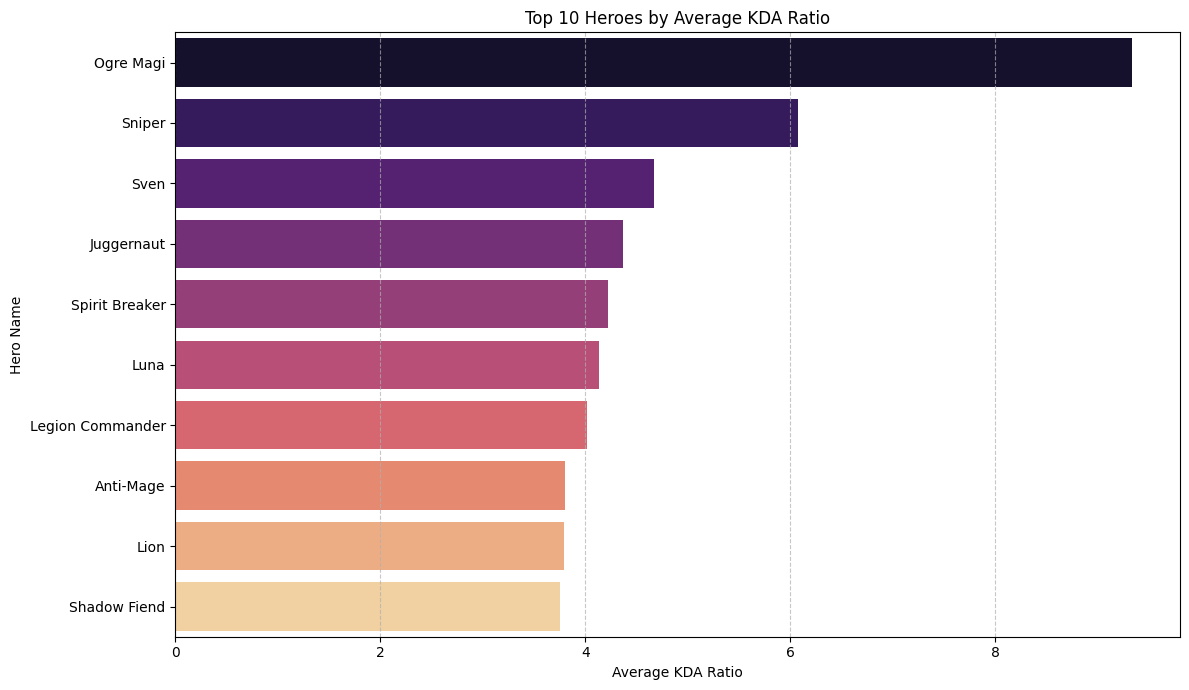

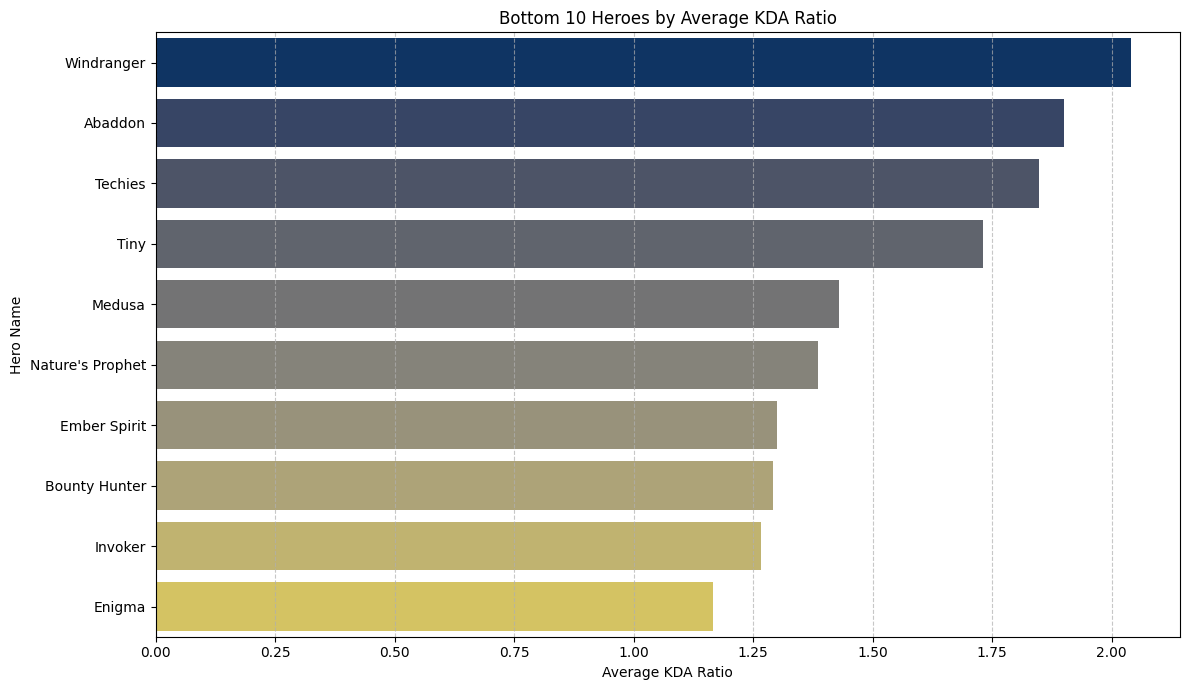

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'hero_name' in hero_average_kda_sorted.columns and 'calculated_kda_ratio' in hero_average_kda_sorted.columns:
    # Get top 10 heroes by average KDA
    top_10_kda_heroes = hero_average_kda_sorted.head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='calculated_kda_ratio', y='hero_name', data=top_10_kda_heroes, hue='hero_name', palette='magma', legend=False)
    plt.title('Top 10 Heroes by Average KDA Ratio')
    plt.xlabel('Average KDA Ratio')
    plt.ylabel('Hero Name')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Get bottom 10 heroes by average KDA
    bottom_10_kda_heroes = hero_average_kda_sorted.tail(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='calculated_kda_ratio', y='hero_name', data=bottom_10_kda_heroes, hue='hero_name', palette='cividis', legend=False)
    plt.title('Bottom 10 Heroes by Average KDA Ratio')
    plt.xlabel('Average KDA Ratio')
    plt.ylabel('Hero Name')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'hero_name' or 'calculated_kda_ratio' in the hero_average_kda_sorted DataFrame.")

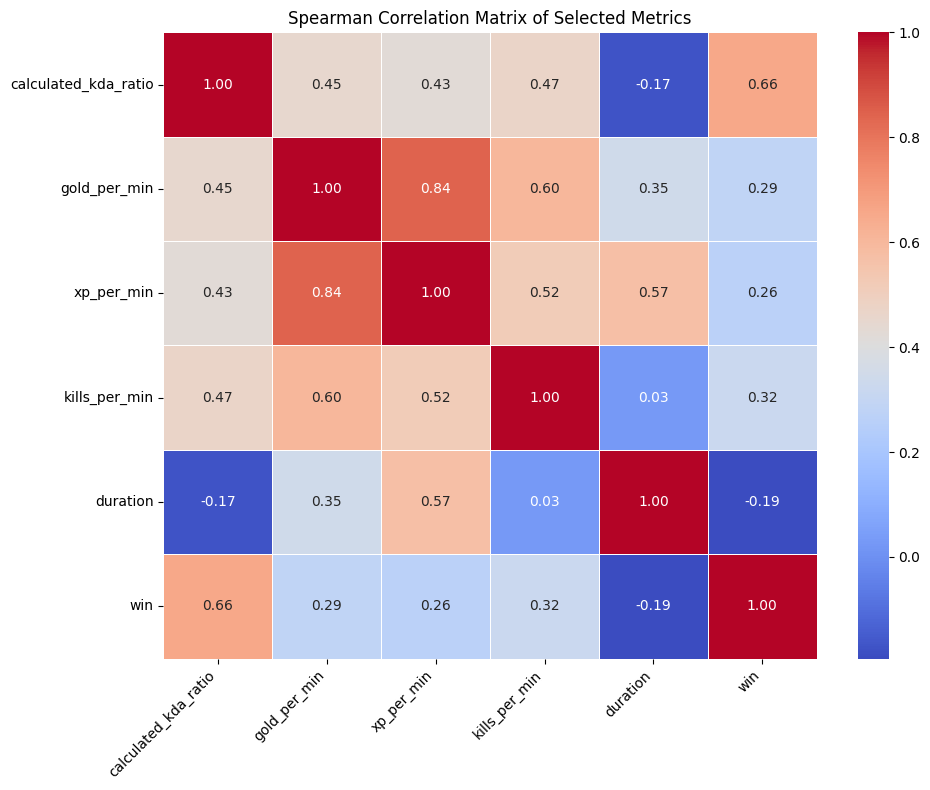

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the specific columns requested by the user for correlation analysis
selected_correlation_cols = [
    'calculated_kda_ratio',
    'gold_per_min',
    'xp_per_min',
    'kills_per_min',
    'duration',
    'win'
]

# Filter out columns that might not exist in the DataFrame
existing_correlation_cols = [col for col in selected_correlation_cols if col in df.columns]

if len(existing_correlation_cols) > 1:
    correlation_matrix = df[existing_correlation_cols].corr(method='spearman')

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Spearman Correlation Matrix of Selected Metrics')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough existing numerical columns to compute a meaningful correlation matrix from the requested list: {selected_correlation_cols}.")

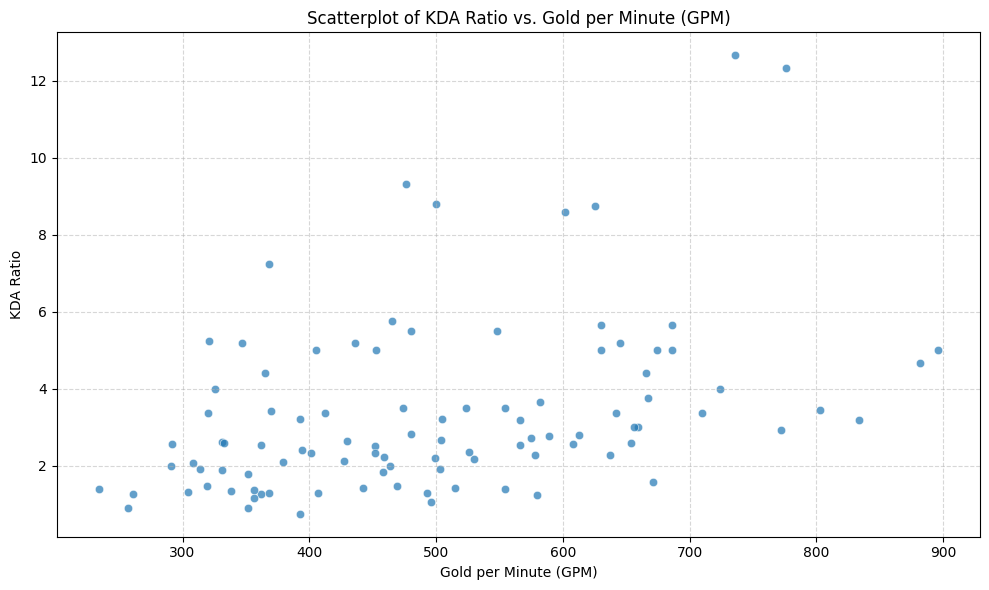

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'calculated_kda_ratio' in df.columns and 'gold_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='gold_per_min', y='calculated_kda_ratio', data=df, alpha=0.7)
    plt.title('Scatterplot of KDA Ratio vs. Gold per Minute (GPM)')
    plt.xlabel('Gold per Minute (GPM)')
    plt.ylabel('KDA Ratio')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    missing_cols = []
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

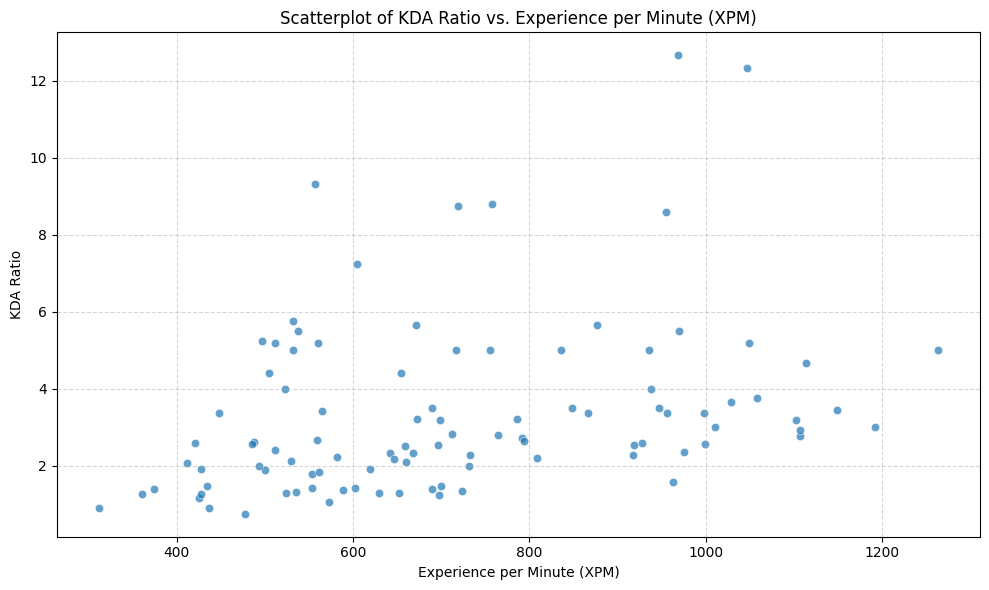

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'calculated_kda_ratio' in df.columns and 'xp_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='xp_per_min', y='calculated_kda_ratio', data=df, alpha=0.7)
    plt.title('Scatterplot of KDA Ratio vs. Experience per Minute (XPM)')
    plt.xlabel('Experience per Minute (XPM)')
    plt.ylabel('KDA Ratio')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    missing_cols = []
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

In [120]:
import pandas as pd

# Ensure weekly_averages DataFrame exists and has the required columns
required_weekly_cols = ['weekly_kda_avg', 'weekly_gpm_avg', 'weekly_xpm_avg']

if all(col in weekly_averages.columns for col in required_weekly_cols):
    consistency_metrics = pd.DataFrame(index=['Standard Deviation (SD)', 'Coefficient of Variation (CV)'])

    for metric_col in required_weekly_cols:
        # Calculate Standard Deviation (SD)
        sd_value = weekly_averages[metric_col].std()

        # Calculate Mean (already computed as avg in weekly_averages for KDA, GPM, XPM)
        mean_value = weekly_averages[metric_col].mean()

        # Calculate Coefficient of Variation (CV = SD / Mean)
        cv_value = (sd_value / mean_value) * 100 if mean_value != 0 else 0 # Express as percentage

        consistency_metrics[metric_col.replace('weekly_', '').replace('_avg', '').upper()] = [sd_value, cv_value]

    print("Consistency Metrics (SD and CV) Across Weeks:")
    display(consistency_metrics.round(2))

    print("\n--- Variability Comparison ---")
    print("Higher Coefficient of Variation indicates greater variability.")
    print("Comparing the CV values:")
    max_cv_metric = consistency_metrics.loc['Coefficient of Variation (CV)'].idxmax()
    min_cv_metric = consistency_metrics.loc['Coefficient of Variation (CV)'].idxmin()
    print(f"  - {max_cv_metric} shows the highest weekly variability (CV = {consistency_metrics.loc['Coefficient of Variation (CV)', max_cv_metric]:.2f}%).")
    print(f"  - {min_cv_metric} shows the lowest weekly variability (CV = {consistency_metrics.loc['Coefficient of Variation (CV)', min_cv_metric]:.2f}%).")

else:
    print(f"Could not find required columns in `weekly_averages` for consistency metrics: {', '.join(required_weekly_cols)}. Please ensure weekly averages are computed.")

Consistency Metrics (SD and CV) Across Weeks:


,KDA,GPM,XPM
Standard Deviation (SD),1.48,123.80,147.33
Coefficient of Variation (CV),42.73,23.55,19.75



--- Variability Comparison ---
Higher Coefficient of Variation indicates greater variability.
Comparing the CV values:
  - KDA shows the highest weekly variability (CV = 42.73%).
  - XPM shows the lowest weekly variability (CV = 19.75%).
